<a href="https://colab.research.google.com/github/sifa12333/AI/blob/main/mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# 1. Load Dataset
df = pd.read_csv('/content/Mall_Customers.csv')
print("Dataset Loaded")
df.head()

Dataset Loaded


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# 2. Eksplorasi Awal
print("\nInfo Data:")
df.info()
print("\nDeskripsi Statistik:")
print(df.describe())


Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Deskripsi Statistik:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50% 

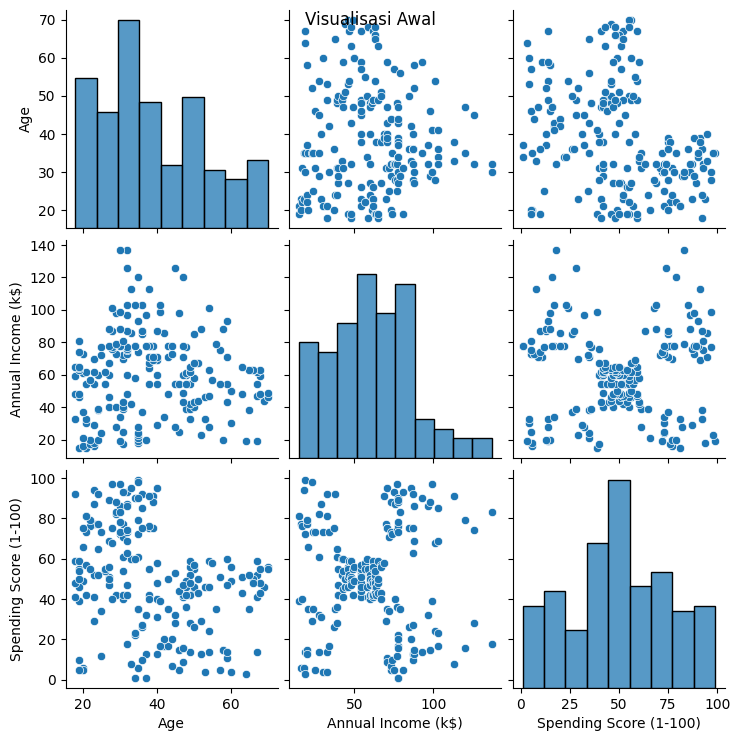

In [9]:
# 3. Visualisasi Awal
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Visualisasi Awal")
plt.show()


In [12]:
# 4. Pra-pemrosesan
# Hilangkan kolom yang tidak dibutuhkan (CustomerID, Gender)
df_clean = df.drop(['CustomerID', 'Genre'], axis=1)

# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)


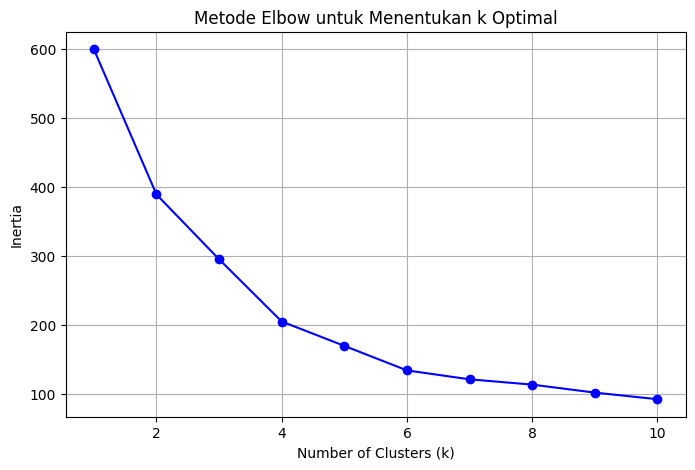

In [13]:
# 5. Menentukan jumlah cluster optimal (metode Elbow)
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.grid()
plt.show()

In [14]:
# 6. K-Means Clustering dengan k = 5 (misal dari elbow)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


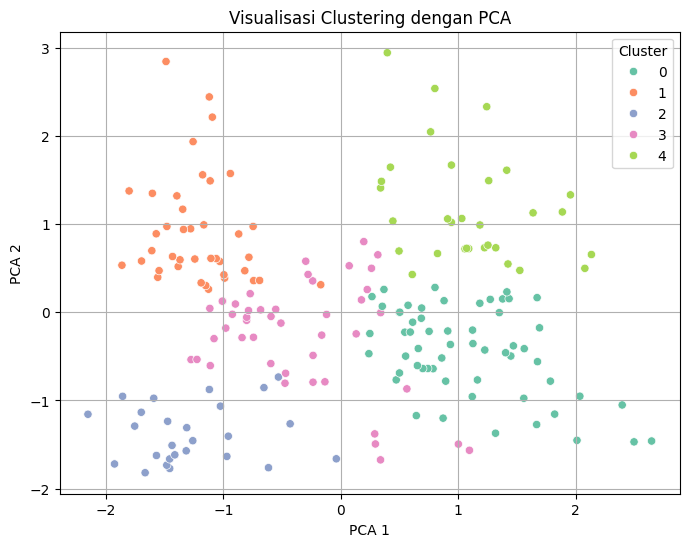

In [15]:
# 7. Visualisasi hasil clustering dengan PCA (2D)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='Set2')
plt.title("Visualisasi Clustering dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [16]:
# 8. Analisis per cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\nRata-rata Setiap Cluster:")
print(cluster_summary)


Rata-rata Setiap Cluster:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         68.775862  55.275862           47.620690               41.706897
1        161.025000  32.875000           86.100000               81.525000
2         23.461538  25.769231           26.115385               74.846154
3         86.377778  26.733333           54.311111               40.911111
4        166.870968  44.387097           89.774194               18.483871
